In [479]:
# Import Required Librarries
import pandas as pd
import numpy as np

### Data Loading and Preprocessing

In [480]:
df = pd.read_csv("../data/data.csv")
print(df.shape)
df.sample(5)

(11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6309,Buick,LaCrosse,2016,flex-fuel (unleaded/E85),304.0,6.0,AUTOMATIC,front wheel drive,4.0,"Flex Fuel,Performance",Large,Sedan,28,18,155,38200
1423,Nissan,Altima,2017,regular unleaded,270.0,6.0,AUTOMATIC,front wheel drive,4.0,Performance,Midsize,Sedan,32,22,2009,27990
2933,Toyota,Corolla,2015,regular unleaded,132.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,37,29,2031,19195
4781,Ford,Focus,2015,flex-fuel (unleaded/E85),160.0,4.0,MANUAL,front wheel drive,4.0,"Hatchback,Flex Fuel",Compact,4dr Hatchback,36,26,5657,18960
1690,Mazda,B-Series Pickup,1998,regular unleaded,150.0,6.0,MANUAL,four wheel drive,2.0,NaN,Compact,Extended Cab Pickup,20,15,586,3033


In [481]:
# drop NULL values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8084 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8084 non-null   object 
 1   Model              8084 non-null   object 
 2   Year               8084 non-null   int64  
 3   Engine Fuel Type   8084 non-null   object 
 4   Engine HP          8084 non-null   float64
 5   Engine Cylinders   8084 non-null   float64
 6   Transmission Type  8084 non-null   object 
 7   Driven_Wheels      8084 non-null   object 
 8   Number of Doors    8084 non-null   float64
 9   Market Category    8084 non-null   object 
 10  Vehicle Size       8084 non-null   object 
 11  Vehicle Style      8084 non-null   object 
 12  highway MPG        8084 non-null   int64  
 13  city mpg           8084 non-null   int64  
 14  Popularity         8084 non-null   int64  
 15  MSRP               8084 non-null   int64  
dtypes: float64(3), int64(5), obj

In [482]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [484]:
# Check Number of Categories for each Featture
def values(df):

    for col in df.columns:
        if df[col].dtype == 'O':
            print(col, len(df[col].value_counts()))
            print(dict(df[col].value_counts()))

values(df)

Make 47
{'Chevrolet': 614, 'Volkswagen': 581, 'Ford': 492, 'Cadillac': 397, 'Mercedes-Benz': 352, 'BMW': 334, 'Infiniti': 330, 'Audi': 328, 'Dodge': 320, 'Nissan': 308, 'Toyota': 300, 'Honda': 282, 'Volvo': 281, 'GMC': 270, 'Acura': 252, 'Mazda': 239, 'Subaru': 214, 'Hyundai': 214, 'Lexus': 202, 'Lincoln': 156, 'Land Rover': 143, 'Porsche': 136, 'Mitsubishi': 125, 'Buick': 125, 'Saab': 111, 'Kia': 109, 'Chrysler': 108, 'Suzuki': 99, 'Aston Martin': 93, 'Pontiac': 77, 'Bentley': 74, 'Ferrari': 68, 'Maserati': 58, 'Lamborghini': 52, 'Scion': 48, 'Plymouth': 39, 'FIAT': 38, 'Rolls-Royce': 31, 'Lotus': 29, 'HUMMER': 17, 'Maybach': 16, 'Alfa Romeo': 5, 'McLaren': 5, 'Spyker': 3, 'Genesis': 3, 'Oldsmobile': 3, 'Bugatti': 3}
Model 713
{'F-150': 122, 'Silverado 1500': 114, 'GTI': 76, 'Beetle': 75, 'Corvette': 60, '911': 58, 'Beetle Convertible': 57, 'Tundra': 56, 'Sierra 1500': 56, 'XC60': 54, '370Z': 51, 'Golf GTI': 50, 'E-Class': 49, 'Ram Pickup 1500': 48, 'Transit Wagon': 48, 'Pilot': 48, '

In [486]:
# Reduce Categories
df['Make'] = df['Make'].apply(lambda x: 'Others' if df['Make'].value_counts()[x] <= 300 else x)
df['Model'] = df['Model'].apply(lambda x: 'Others' if df['Model'].value_counts()[x] <= 50 else x)
df['Model'] = df['Model'].apply(lambda x: 'Others' if df['Model'].value_counts()[x] <= 50 else x)

### Training, Testing and Evaluation

In [487]:
# encode the categorical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in df.columns:
        if df[col].dtype == 'O':
            df[col] = encoder.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8084 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8084 non-null   int32  
 1   Model              8084 non-null   int32  
 2   Year               8084 non-null   int64  
 3   Engine Fuel Type   8084 non-null   int32  
 4   Engine HP          8084 non-null   float64
 5   Engine Cylinders   8084 non-null   float64
 6   Transmission Type  8084 non-null   int32  
 7   Driven_Wheels      8084 non-null   int32  
 8   Number of Doors    8084 non-null   float64
 9   Market Category    8084 non-null   int32  
 10  Vehicle Size       8084 non-null   int32  
 11  Vehicle Style      8084 non-null   int32  
 12  highway MPG        8084 non-null   int64  
 13  city mpg           8084 non-null   int64  
 14  Popularity         8084 non-null   int64  
 15  MSRP               8084 non-null   int64  
dtypes: float64(3), int32(8), int

In [488]:
# split input and output features
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(x.shape)
print(y.shape)

(8084, 15)
(8084,)


In [489]:
# split training and testing data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)


(6467, 15)
(6467,)
(1617, 15)
(1617,)


In [490]:
# Train Model
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=20)
model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=20)

In [491]:
# Prediction
ypred = model.predict(xtest)
ypred

array([ 35775.        ,  26005.        ,  17845.        , ...,
        32289.28571429, 161100.        ,  30875.        ])

In [493]:
#Evaluation
from sklearn.metrics import mean_absolute_error

acc = mean_absolute_error(ytest, ypred)
acc

3994.410893199848

(array([1.027e+03, 3.570e+02, 1.360e+02, 3.700e+01, 1.400e+01, 1.100e+01,
        4.000e+00, 6.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

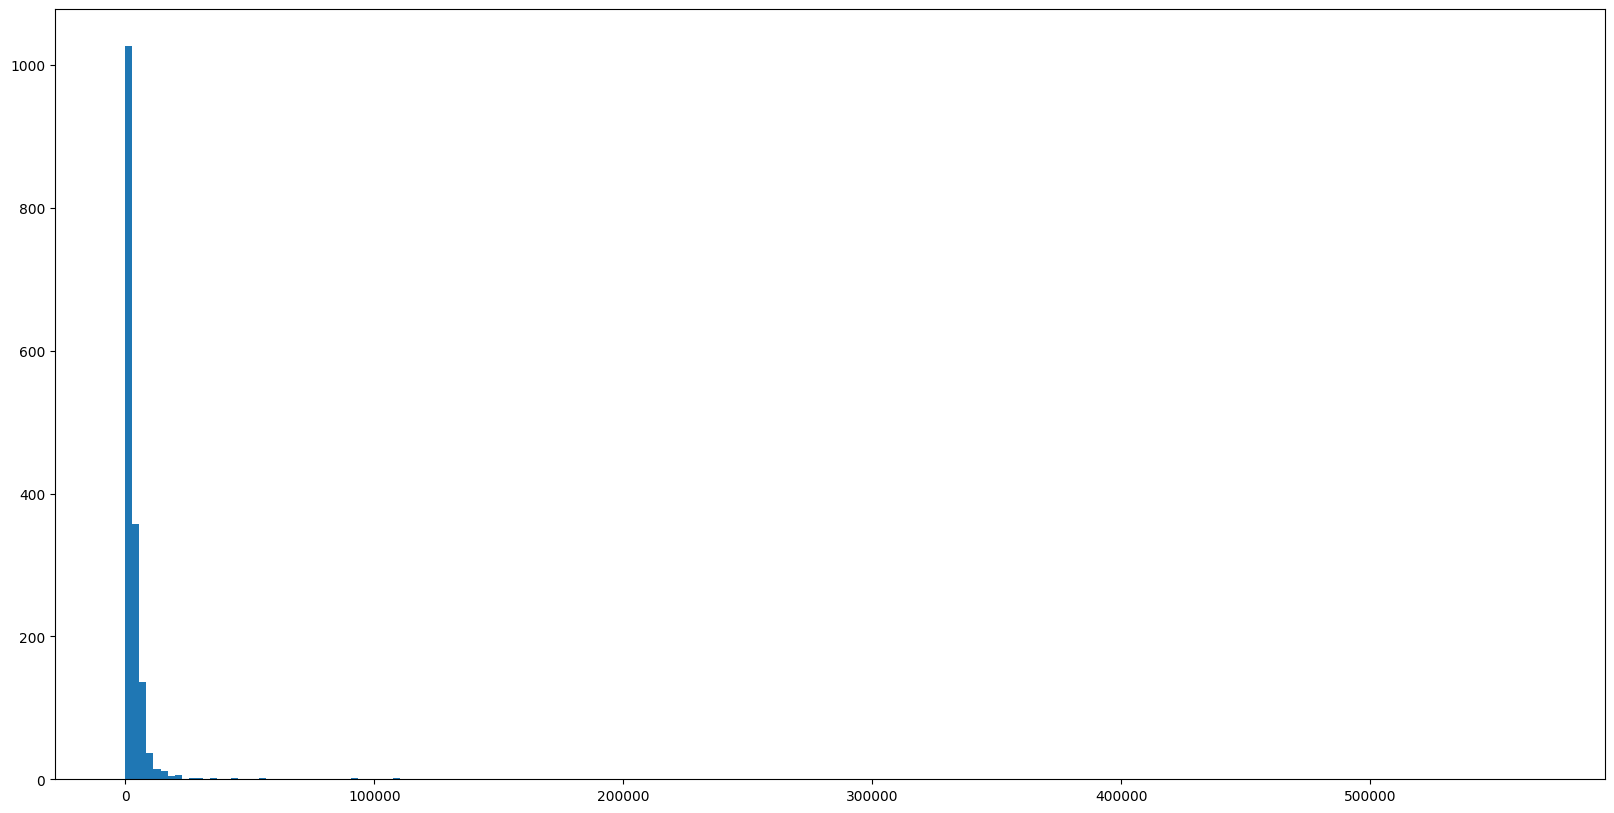

In [512]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
# plt.scatter(list(range(len(ypred))), ytest, s=5, alpha=0.2)
# plt.scatter(list(range(len(ypred))), ypred, s=5, alpha=0.2)
plt.hist(abs(ytest - ypred), bins=200)

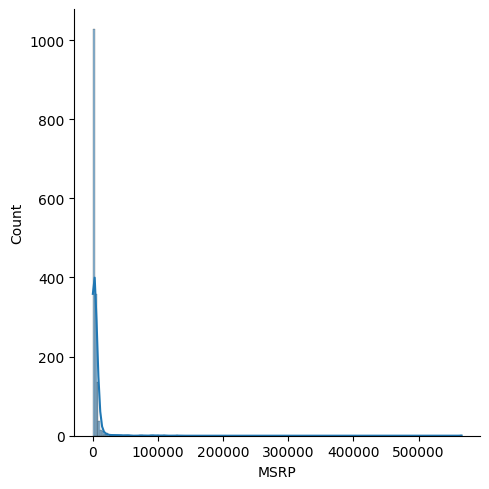

In [514]:
import seaborn as sns

sns.displot(abs(ytest - ypred), kde=True, bins=200)

[Text(0.7964790556780181, 0.9838709677419355, 'x[5] <= 9.0\nsquared_error = 5160630036.463\nsamples = 6467\nvalue = 50289.41'),
 Text(0.6039556513773117, 0.9516129032258065, 'x[4] <= 397.5\nsquared_error = 1214248911.032\nsamples = 6221\nvalue = 41251.09'),
 Text(0.7002173535276649, 0.967741935483871, 'True  '),
 Text(0.3398085210952833, 0.9193548387096774, 'x[4] <= 236.5\nsquared_error = 285211179.1\nsamples = 5591\nvalue = 33344.458'),
 Text(0.1015917364447794, 0.8870967741935484, 'x[2] <= 2000.5\nsquared_error = 126283365.918\nsamples = 2604\nvalue = 22825.291'),
 Text(0.01990812897988836, 0.8548387096774194, 'x[12] <= 15.5\nsquared_error = 9838238.249\nsamples = 433\nvalue = 2633.159'),
 Text(0.011136274342646612, 0.8225806451612904, 'x[8] <= 3.0\nsquared_error = 251094420.64\nsamples = 5\nvalue = 23051.6'),
 Text(0.010661838291437171, 0.7903225806451613, 'x[2] <= 1996.0\nsquared_error = 14054614.222\nsamples = 3\nvalue = 35769.667'),
 Text(0.01042462026583245, 0.7580645161290323, 

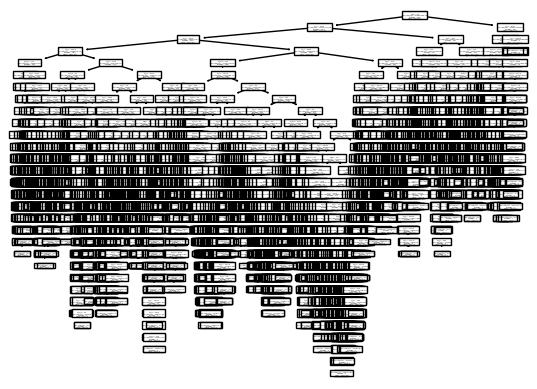

In [145]:
from sklearn.tree import plot_tree

plot_tree(model)